In [1]:
import pandas as pd

# Load file CSV
file_path = 'facial_landmarks_full_468.csv'  # Ganti dengan path yang benar jika berbeda
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk memastikan data sudah termuat
data.head()

,Engagement_Level,Landmark_0_x,Landmark_1_x,Landmark_2_x,Landmark_3_x,Landmark_4_x,Landmark_5_x,Landmark_6_x,Landmark_7_x,Landmark_8_x,...,Landmark_458_y,Landmark_459_y,Landmark_460_y,Landmark_461_y,Landmark_462_y,Landmark_463_y,Landmark_464_y,Landmark_465_y,Landmark_466_y,Landmark_467_y
0,0,0.672396,0.603818,0.681184,0.562980,0.669133,0.575740,0.664707,0.524197,0.681527,...,0.664268,0.486431,0.662849,0.490429,0.664255,0.493259,0.690948,0.474860,0.693056,0.469198
1,0,0.343553,0.820154,0.335229,0.777335,0.351005,0.794086,0.344872,0.745910,0.334754,...,0.401066,0.723343,0.393500,0.726202,0.386513,0.727882,0.444847,0.723835,0.452691,0.716983
2,0,0.450929,0.627631,0.437334,0.595748,0.449681,0.602586,0.437664,0.553482,0.435787,...,0.478511,0.514413,0.473378,0.518365,0.468892,0.522089,0.519447,0.510380,0.524734,0.505353
3,0,0.450062,0.535659,0.437099,0.497743,0.449536,0.509770,0.438579,0.458209,0.435913,...,0.480345,0.424103,0.474694,0.427500,0.469670,0.429949,0.518935,0.414415,0.524484,0.408115
4,0,0.378432,0.544839,0.369429,0.494236,0.384072,0.519108,0.380081,0.466767,0.370037,...,0.438228,0.450193,0.429972,0.452547,0.422501,0.452668,0.477304,0.441925,0.484940,0.433362


In [2]:
# Pisahkan fitur (X) dan label (y)
X = data.drop(columns=['Engagement_Level'])  # Semua kolom kecuali label
y = data['Engagement_Level']  # Label: Engagement level (0, 1, 2, 3)

In [3]:
from sklearn.model_selection import train_test_split

# Bagi dataset: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data training
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Prediksi dengan data testing
y_pred = rf_model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Tampilkan laporan klasifikasi (precision, recall, F1-score)
print(classification_report(y_test, y_pred, target_names=['Engagement 0', 'Engagement 1', 'Engagement 2', 'Engagement 3']))

Akurasi: 91.87%
              precision    recall  f1-score   support

Engagement 0       0.97      0.88      0.92       243
Engagement 1       0.92      0.91      0.92       223
Engagement 2       0.89      0.97      0.93       225
Engagement 3       0.90      0.92      0.91       256

    accuracy                           0.92       947
   macro avg       0.92      0.92      0.92       947
weighted avg       0.92      0.92      0.92       947



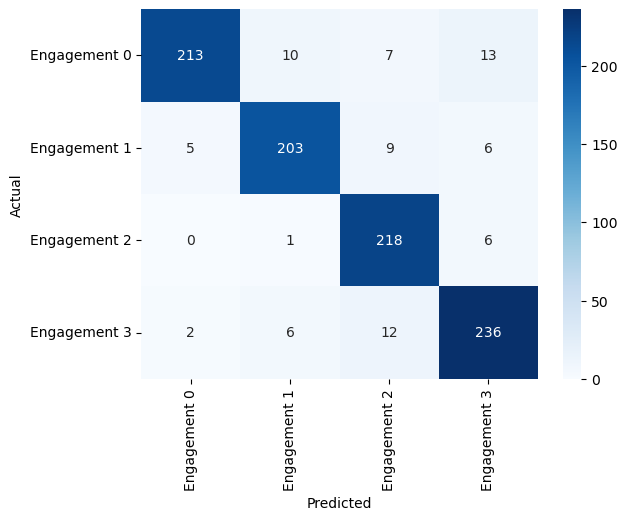

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Engagement 0', 'Engagement 1', 'Engagement 2', 'Engagement 3'], yticklabels=['Engagement 0', 'Engagement 1', 'Engagement 2', 'Engagement 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

generalization_gap = train_accuracy - test_accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Generalization Gap: {generalization_gap * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 91.87%
Generalization Gap: 8.13%


In [9]:
import numpy as np

# Menambahkan noise Gaussian
noise = np.random.normal(0, 0.1, X_test.shape)  # Variasi noise dapat disesuaikan
X_test_noisy = X_test + noise

# Evaluasi model pada data dengan noise
y_pred_noisy = rf_model.predict(X_test_noisy)
noisy_accuracy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy with Noisy Data: {noisy_accuracy * 100:.2f}%")

Accuracy with Noisy Data: 37.59%


In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores) * 100:.2f}%")
print(f"Cross-Validation Std Dev: {np.std(cv_scores) * 100:.2f}%")

Cross-Validation Mean Accuracy: 90.42%
Cross-Validation Std Dev: 1.00%


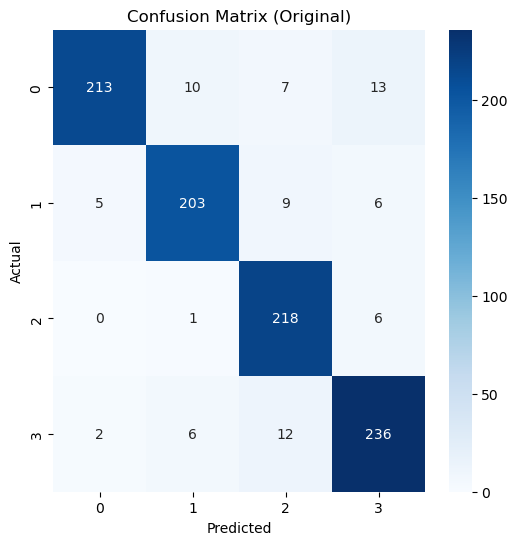

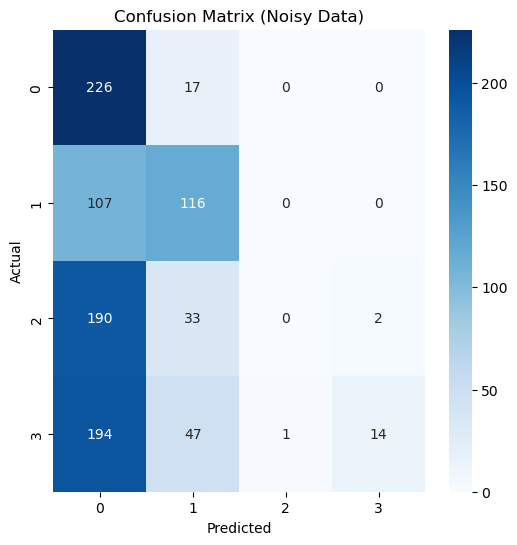

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix tanpa noise
cm_original = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'])
plt.title('Confusion Matrix (Original)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix dengan noise
cm_noisy = confusion_matrix(y_test, y_pred_noisy)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_noisy, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'])
plt.title('Confusion Matrix (Noisy Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
import joblib

# Simpan model ke file
joblib.dump(rf_model, 'random_forest_model_Full_Face.pkl')

print("Model telah disimpan")

Model telah disimpan


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan di-tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Jumlah pohon dalam Random Forest
    'max_depth': [10, 20, 30, None],      # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],      # Jumlah sampel minimum untuk split
    'min_samples_leaf': [1, 2, 4]         # Jumlah sampel minimum di setiap daun
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Latih Grid Search dengan data training
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

# Model terbaik dari hasil Grid Search
best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data testing
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")

# Laporan klasifikasi model terbaik
print(classification_report(y_test, y_pred_best, target_names=['Engagement 0', 'Engagement 1', 'Engagement 2', 'Engagement 3']))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
